Uma das maneiras de estimas a área de um círculo $C$ é através da Integração de Monte Carlo. Podemos amostrar pontos de um quadrado circunscrito em $C$ e observar quantos pontos estão de fato contidos em $C$.

Veja o exemplo abaixo:

![area_monte_carlo](area_monte_carlo.png)

Foram sorteados 1000 pontos dentro da região (um quadrado $2x2$), dos quais $4 / 5$ caíram dentro do círculo. Assim, a área do círculo é $4 / 5$ da da área do quadrado (que é conhecida: 4). Assim, a área estimada de $C$ é $\frac{4}{5} \times 4 = 3.2$. 

Essa estimativa é muito útil também para estimar o valor de $\pi$: $A_C = \pi r^{2} = \pi \approx 3.2$.

Na sua linguagem de programação favorita, implemente um algoritmo que seja capaz de gerar 3 histogramas para os valores obtidos para $\pi$, cada um realizando 1000 testes em que se sorteiam

* 50 pontos por teste
* 100 pontos por teste
* 500 pontos por teste

Os pontos contidos em um quadrado de lado $L = 2$ centrado na origem podem ser escolhidos com o auxílio da função _random.uniform_ da biblioteca numpy, que seleciona amostras da distribuição uniforme em um intervalo especificado de valores. Dado um conjunto de pontos $(x, y)$ selecionados ao acaso, tal ponto estará no círculo se e somente se $x^2 + y^2 < 1$. Com este critério pode-se facilmente contar a proporção de pontos contidos no círculo.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

In [2]:
# parâmetros
pontos_por_teste = [50, 100, 500]
num_iter = 1000
# salva as areas (proporção * 4) para cada caso ao longo das iterações
areas = {50:[], 100:[], 500:[]}
# função auxiliar para determinar o número de pontos dentro do círculo
pertence_ao_circulo = lambda x: (x[0]**2 + x[1]**2) < 1

# Para cada parâmetro N de número de pontos:
# 1. Seleciona N pontos em [-1, 1] x [-1, 1] uniformemente.
# 2. Especifica quais pontos estão no interior do círculo de raio 1 centro na origem
# 3. Salva a proporção de pontos internos ao círculo no dicionário
for N in pontos_por_teste:
    for t in range(num_iter):
        pontos = np.array(list(zip(np.random.uniform(low = -1, high = 1, size = N),
                                   np.random.uniform(low = -1, high = 1, size = N))))
        pontos_do_circulo = np.apply_along_axis(pertence_ao_circulo,
                                                1,
                                                pontos).astype(int)
        areas[N].append((4*pontos_do_circulo).sum()/N)

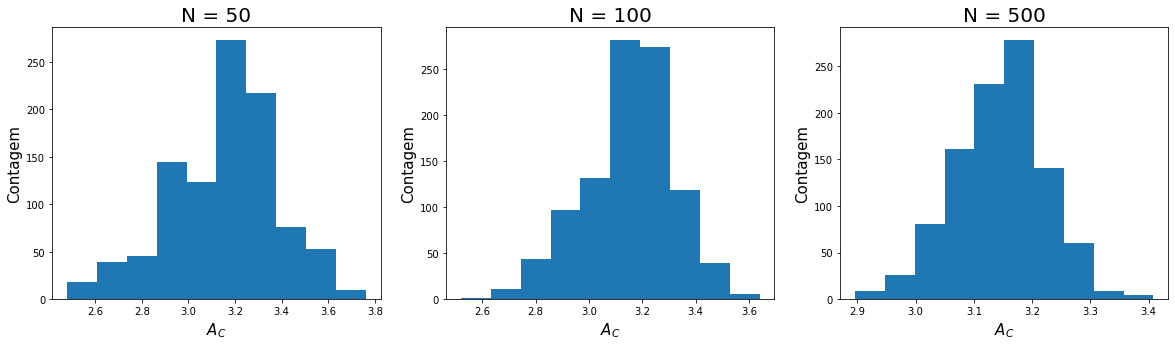

In [3]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))

for k in range(3):
    axs[k].hist(areas[pontos_por_teste[k]])
    
titles = ["N = 50", "N = 100", "N = 500"]
for k, title in enumerate(titles):
    axs[k].set_title(title, fontsize = 20)
    axs[k].set_xlabel(r"$A_C$", fontsize = 15)
    axs[k].set_ylabel("Contagem", fontsize = 15)